In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle('my_df.pkl')

In [3]:
df.head(10)

,Race,Number of Deaths,Population,Crude Death Rate,Age Adjusted Death Rate,Confidence Interval,Standard Error,year
0,American Indian or Alaska Native,"1,878","2,832,761",66.3,138.3,3.4,0.0%,1999
1,Asian or Pacific Islander,"8,976","11,346,496",79.1,125.4,1.4,0.1%,1999
2,Black or African American,"63,124","36,173,121",174.5,257.3,1.0,0.7%,1999
3,White,"489,087","228,687,790",213.9,202.9,0.3,5.6%,1999
4,American Indian or Alaska Native,"1,959","2,984,150",65.6,130.8,3.2,0.0%,2000
5,Asian or Pacific Islander,"9,415","11,757,685",80.1,124.7,1.4,0.1%,2000
6,Black or African American,"63,081","36,594,309",172.4,253.1,1.0,0.7%,2000
7,White,"492,182","230,085,762",213.9,202.2,0.3,5.7%,2000
8,American Indian or Alaska Native,"2,213","3,097,333",71.4,140.0,3.2,0.0%,2001
9,Asian or Pacific Islander,"9,992","12,429,181",80.4,122.7,1.3,0.1%,2001


In [4]:
df['death_rate'] = pd.to_numeric(df['Crude Death Rate'])
df['year'] = pd.to_numeric(df['year'])
df.dtypes

Race                        object
Number of Deaths            object
Population                  object
Crude Death Rate            object
Age Adjusted Death Rate     object
Confidence Interval         object
Standard Error              object
year                         int64
death_rate                 float64
dtype: object

In [5]:
racial_death_rate = df[['Race', 'death_rate']].groupby('Race').mean()
racial_death_rate['death_rate'] = racial_death_rate['death_rate'] / 1000
racial_death_rate

,death_rate
Race,
American Indian or Alaska Native,0.068773
Asian or Pacific Islander,0.081980
Black or African American,0.163773
White,0.207947


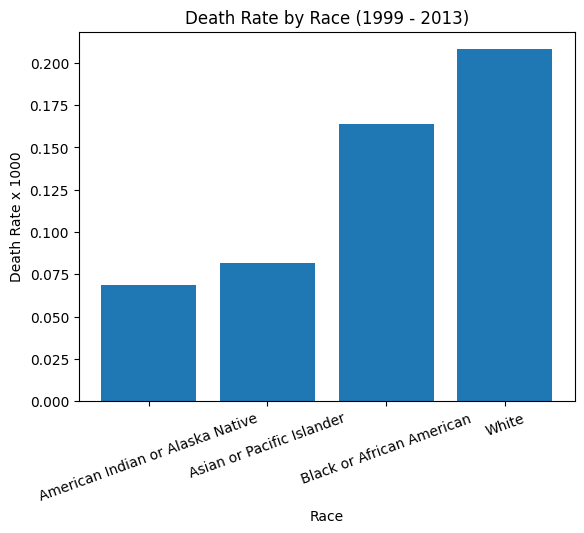

In [6]:
plt.bar(x = racial_death_rate.index, height = racial_death_rate['death_rate'])
plt.xticks(rotation = 20)
plt.title('Death Rate by Race (1999 - 2013)')
plt.ylabel('Death Rate x 1000')
plt.xlabel('Race')
plt.show()

In [7]:
death_rate_over_time = df[['year', 'death_rate']].groupby('year').mean()
death_rate_over_time['death_rate'] = death_rate_over_time['death_rate'] / 1000
death_rate_over_time

,death_rate
year,
1999,0.133450
2000,0.133000
2001,0.133425
2002,0.132050
2003,0.130750
2004,0.130550
2005,0.130900
2006,0.129050
2007,0.129100


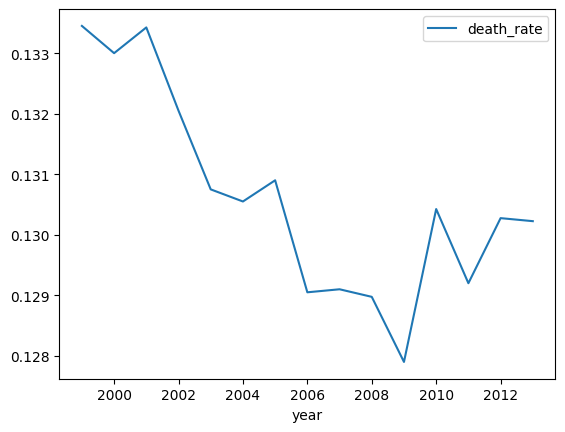

In [8]:
death_rate_over_time.plot()
plt.show()